# Regularized Classification on Student Alcohol Dataset

We are going to use a dataset from Kaggle (https://www.kaggle.com/uciml/student-alcohol-consumption)
 
### Dataset description

>The data were obtained in a survey of students from the portuguese language courses in a secondary school. It contains a lot of interesting social, gender and study information about students.

> Have a look at the information about the dataset at the webpage: https://www.kaggle.com/uciml/student-alcohol-consumption

>In this context, we ask you to estimate which students are the most prone to alcohol consumption given some social and educational information. 

# TO DO: put your Surname, Name and ID number ("numero di matricola")


Student Name: Valente Alessandro

ID Number: 1234429


In [1]:
import numpy as np

# The seed will be used as seed for splitting the data into training and test. 
# You can place your ID or also try different seeds to see the impact of the random subdvision of the train and test sets
# and of the random components in the algorithm on the results
IDnumber = 1234429
np.random.seed(IDnumber)

In [2]:
# let's load library for plotting
%matplotlib inline  
import matplotlib.pyplot as plt

## Data Preprocessing

Load the data from a .csv file. In this notebook we use the pandas (Python Data Analysis Library) package, since it provides useful functions to clean the data. In particular, it allows us to remove samples with missing data, as we do below. We also plot some descriptions of columns, check the pandas documentation for 'describe()' if you want to know more.

In [3]:
# let's load pands and numpy
import pandas as pd
import numpy as np

# this time we use pandas to load and clean the dataset

# read the data from the csv file
df = pd.read_csv("data/student-data.csv", sep=',')

# let's see some statistics about the data 
df.describe()

,drink_alcohol,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,Marks
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.454545,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.184900,3.536210,3.659476,11.906009
std,0.498314,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175766,1.446259,4.640759,3.230656
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,10.000000
50%,0.000000,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,12.000000
75%,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,6.000000,14.000000
max,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


Now we create data matrices: many of the features are categorical, so we need to encode them with ***indicator matrices*** (i.e., using the so called one-hot encoding). That is, if a feature can take $\ell$ different values $v_1,\dots,v_{\ell}$, we create $\ell$ indicator (0-1) features $I_1,\dots,I_{\ell}$, such that $I_{j} = 1$ if and only if the value of the feature is $v_j$. This can be done in Python by first encode a feature with integers with LabelEncoder() and then obtain the indicator variables with OneHotEncoder().

In [4]:
#df.values contains the data, both the values of instances and the value of the label
Data = df.values
# the matrix including the categorical data is given by columns from the second one 
X_categorical = Data[:,1:]
# the target value (class) is in the first column
Y = Data[:,0]

print(list(df))

# get the number d of features of each sample
d = X_categorical.shape[1]

# get the number m of samples
m = X_categorical.shape[0]

#let's see what the number of samples is
print("Number of samples: {}".format(m))

#now encode categorical variables using integers and one-hot-encoder

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(categories='auto')

# encode the first column of the data matrix into indicator variables

X_tmp = label_encoder.fit_transform(X_categorical[:,1])
X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
X = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
print("Categorical feature:", df.columns[1], "   Number of categories:", X[1,:].shape)

# repeat for the other categorical input variables
index_categorical = [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(1,19):
    if i in index_categorical:
        X_tmp = label_encoder.fit_transform(X_categorical[:,i])
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X_tmp = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
        X = np.hstack((X,X_tmp))
        print("Categorical feature:", df.columns[i+1], "   Number of categories:", X_tmp[1,:].shape)
    else:
        X_tmp = X_categorical[:,i]
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X = np.hstack((X,X_tmp))
        print("Valued feature:", df.columns[i+1])
        
print("Shape of X:", X.shape)
print("Sample element from X:", X[20,:])

['drink_alcohol', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Marks']
Number of samples: 649
Categorical feature: school    Number of categories: (2,)
Categorical feature: sex    Number of categories: (2,)
Valued feature: age
Categorical feature: address    Number of categories: (2,)
Categorical feature: famsize    Number of categories: (2,)
Categorical feature: Pstatus    Number of categories: (2,)
Categorical feature: Medu    Number of categories: (5,)
Categorical feature: Fedu    Number of categories: (5,)
Categorical feature: Mjob    Number of categories: (5,)
Categorical feature: Fjob    Number of categories: (5,)
Categorical feature: guardian    Number of categories: (3,)
Categorical feature: traveltime    Number of categories: (4,)
Categorical feature: studytime    Number of categories: (4,)
Categorical feature: famrel    Number of categories:

## Data Preprocessing

The class labels are already 0-1, so we can use them directly.

In [5]:
# properly encode the target labels
Y = label_encoder.fit_transform(Y)
K = max(Y) + 1 # number of classes

print("Number of classes: "+str(K))

Number of classes: 2


Given $m$ total data points, keep $m\_training = 100$ data points as data for ***training and validation*** and $m\_test = m - m\_training$ as test data. Splitting is random, using as seed your ID number. Make sure that the training set contains at least 10 instances from each class.If it does not, modify the code so to apply a random
permutation (or the same permutation multiple times) to the samples until this happens.

In [6]:
# Split data into training and validation data

# load a package which is useful for the training-test splitting
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# number of samples
m = np.shape(X)[0]

#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]

m_training = 100 #  # use 100 samples for training + validation...
m_test = m-m_training # and the rest for testing

# test_size is the proportion of samples in the test set
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

#let's see what the fraction of ones in the entire dataset is
print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

[1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1]
0.45454545454545453


Standardize the data to have zero-mean and unit variance (columnwise):

In [7]:
# Standardize the Features Matrix
from sklearn import preprocessing

X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

#let's use the standard scaling; we degine the scaling for the entire dataset
scaler = preprocessing.StandardScaler().fit(X)

#let's apply the scaling to the training set

X_training = scaler.transform(X_training)
#let's apply the scaling to the test set

X_test = scaler.transform(X_test)

### Perform Logistic Regression

We now perform logistic regression using the function provided by Scikit-learn.

Note: as provided by Scikit-learn, logistic regression is always implemented using regularization. However, the impact of regularization can be dampened to have almost no regularization by changing the parameter $C$, which is the inverse of $\lambda$. Therefore to have no regularization, which is $\lambda = 0$ for the model seen in class, we need $C$ to have a large value. Here we fix $C = 100000000$.

[Note that the intercept is estimated in the model.]

For all our models we are going to use 10-fold cross validation to estimate the parameters (when needed) and/or estimate the validation error.

In [8]:
from sklearn import linear_model

# define a logistic regression model with very high C parameter -> low impact from regularization;
# there are many solvers available to obtain the solution to the logistic regression problem, we just pick
# one of them; 'cv' is the number of folds in cross-validation; we also specify l2 as regularization penalty,
# just to pick one; Cs contains the values of C to be tested and to pick from with validation. Here we
# are interested in only 1 value of C, and use cross-validation just to estimate the validation error
# in a same way as other models

reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
reg.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))

# let's store the best CV accuracy, and then print it
print(type(reg.scores_))
reg_best_CV_accuracy = max(reg.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

Values of parameter C tried in 10-fold Cross-Validation: [100000000]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.55212121]
Best value of parameter C according to 10-fold Cross-Validation: 100000000
<class 'dict'>
10-fold Cross-Validation accuracies obtained with the best value of parameter C: [0.8]


Note that the logistic regression function in Scikit-learn has many optional parameters. Read the documentation if you want to understand what they do!

## TODO 1
### Learn the best model from Logistic Regression on the entire training set and examine coefficients (by printing and plotting them)

Note that you can use simply $linear\_model.LogisticRegression()$, that does not use cross-validation, without passing the best value of $C$ (and then fit()).

Coefficients obtained using the entire training set: [[-2.88478669e-01  2.88478669e-01 -2.88478669e-01  2.88478669e-01
   6.26488876e-02  1.97804711e-01 -1.97804711e-01 -1.47778504e-01
   1.47778504e-01 -7.47956684e-01  7.47956684e-01 -4.21950124e-01
   3.06416142e-01 -5.41123049e-01  2.71943613e-01  1.04774207e-01
  -3.75385734e-01 -3.47946149e-01  1.06314646e+00 -9.99719615e-01
   2.44811027e-01  2.72063374e-01  2.07041277e-01 -5.33816991e-01
  -4.45390933e-01  8.84878077e-01 -5.97425698e-02  5.32312054e-02
   5.24913469e-01 -2.26388909e-01 -6.71987857e-01 -1.28207795e-01
  -9.21298969e-01  1.95735352e+00  7.57003454e-01  2.36182459e-01
  -1.02873738e+00 -1.30374016e+00 -2.28432002e-02 -2.89736398e-01
  -9.27260874e-02  8.33992535e-01  6.33463462e-01  3.01068208e-01
   7.83974996e-01 -5.14461176e-01 -4.55376339e-01  5.00695841e-01
  -3.83113617e-02 -2.22176672e-01 -1.01278424e-02 -8.31634727e-04
  -4.49263691e-01 -9.25502878e-01 -1.06679138e-01  3.07806378e-01
   1.13474548e+00 -2.81

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


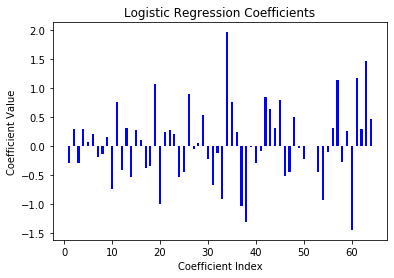

In [9]:
#Use a large C to disable regularization
reg_full = linear_model.LogisticRegression(C=10000000)
reg_full.fit(X_training, Y_training)


# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( reg_full.intercept_ ))

print("total number coef:  ",len(reg_full.coef_[0]) )
print("below 1e0  coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e0]))
print("below 1e-1 coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e-1]))
print("below 1e-2 coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e-2]))
print("below 1e-3 coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e-3]))

# Plot the coefficients
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='b')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

## TO DO 2

### Questions: How many coefficients do you get (recall that the one-hot encoding has been used for some of the features)? Why? How many of them are "close" to 0? What do negative coefficient values mean? (max 5 lines)

### Answer to the questions

Since the one-hot encoding was performed the values that variables can obtained are encoded, i should then expect a total number of coefficients equal to the total sum of features in the data set which is verified since both have the vale of 64.
If taken in module only 8 coefficient have close to 0 values, where with close to 0 is meant inferior to 0.1 and only one parameter has a value inferior to 0.01.
Negative value may mean that there is a inverse relation (anticorrelation) between the interested features.


## TO DO 3
### Predict labels on training and test

- Compute the predicted labels on training and test data using reg.predict
 - Evaluate the accuracy using metrics.accuracy_score from scikit-learn (it returns the percentage of data correctly classified).
 - Evaluate the score used by logistic regression on training and test data using metrics.accuracy_score()

In [10]:
from sklearn import metrics

# prediction on training data
Y_training_prediction_LR = reg_full.predict(X_training)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset

print("Accuracy estimation for training set: ", metrics.accuracy_score(Y_training, Y_training_prediction_LR))
# prediction on test data
Y_test_prediction_LR = reg_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset

print('Accuracy estimation for test set: ',metrics.accuracy_score(Y_test, Y_test_prediction_LR))


Accuracy estimation for training set:  0.88
Accuracy estimation for test set:  0.5828779599271403


## TO DO 4
### Use L2 regularized logistic regression with cross-validation

We perform the L2 regularization for different values of the regularization parameter $C$, and use the Scikit-learn function to perform cross-validation (CV).

In L2 regularized logistic regression, the following L2 regularization term is added to the loss:

$$
    \lambda \sum_{i=1}^d w_i^2
$$

The parameter $C$ used by Scikit learn corresponds to the inverse of $\lambda$, that is $C = \frac{1}{\lambda}$.

Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- use LogisticRegressionCV() to select the best value of C with a 10-fold CV with L2 penalty;
- use LogisticRegression() to learn the best model for the best C with L2 penalty on the entire training set

Note that LogisticRegressionCV() picks some default values of C to try, but you may need to pass some other values in case for your dataset you need to explore a different interval of values. This applies every time that you use LogisticRegressionCV().

In [11]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
RegL2 = linear_model.LogisticRegressionCV(cv=10, penalty='l2', Cs=[10**x for x in range (-10,10)])

#fit the model on training data
RegL2.fit(X_training, Y_training)


# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( RegL2.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

CV_accuracies = RegL2.scores_

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best C parameter:", RegL2.C_)
# let's store the best CV accuracy, and then print it
print(RegL2.scores_[1])
RegL2_best_CV_accuracy = np.max(RegL2.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( RegL2_best_CV_accuracy ))

#define the model using the best C and an appropriate solver
bestC=RegL2.C_[0] #if i plug in directly return error 

BestRegL2 = linear_model.LogisticRegression( penalty='l2', C=bestC)

#fit the model using the best C on the entire training set

BestRegL2.fit(X_training, Y_training)

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Incre

Values of parameter C tried in 10-fold Cross-Validation: [1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: {1: array([[0.63636364, 0.54545455, 0.54545455, 0.54545455, 0.54545455,
        0.54545455, 0.54545455, 0.54545455, 0.54545455, 0.54545455,
        0.54545455, 0.54545455, 0.45454545, 0.45454545, 0.45454545,
        0.45454545, 0.45454545, 0.45454545, 0.45454545, 0.45454545],
       [0.6       , 0.6       , 0.6       , 0.6       , 0.6       ,
        0.6       , 0.6       , 0.6       , 0.5       , 0.4       ,
        0.6       , 0.5       , 0.4       , 0.4       , 0.4       ,
        0.4       , 0.4       , 0.4       , 0.4       , 0.4       ],
       [0.8       , 0.6       , 0.6       , 0.6       , 0.6       ,
        0.6       , 0.6       , 0.6       , 1.        , 0.9       ,
        0.7       , 0.8       , 0

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### TO DO 5: Print and plot the coefficients from logistic regression with and without regularization.

Non regularized coefficients : [[-2.88478669e-01  2.88478669e-01 -2.88478669e-01  2.88478669e-01
   6.26488876e-02  1.97804711e-01 -1.97804711e-01 -1.47778504e-01
   1.47778504e-01 -7.47956684e-01  7.47956684e-01 -4.21950124e-01
   3.06416142e-01 -5.41123049e-01  2.71943613e-01  1.04774207e-01
  -3.75385734e-01 -3.47946149e-01  1.06314646e+00 -9.99719615e-01
   2.44811027e-01  2.72063374e-01  2.07041277e-01 -5.33816991e-01
  -4.45390933e-01  8.84878077e-01 -5.97425698e-02  5.32312054e-02
   5.24913469e-01 -2.26388909e-01 -6.71987857e-01 -1.28207795e-01
  -9.21298969e-01  1.95735352e+00  7.57003454e-01  2.36182459e-01
  -1.02873738e+00 -1.30374016e+00 -2.28432002e-02 -2.89736398e-01
  -9.27260874e-02  8.33992535e-01  6.33463462e-01  3.01068208e-01
   7.83974996e-01 -5.14461176e-01 -4.55376339e-01  5.00695841e-01
  -3.83113617e-02 -2.22176672e-01 -1.01278424e-02 -8.31634727e-04
  -4.49263691e-01 -9.25502878e-01 -1.06679138e-01  3.07806378e-01
   1.13474548e+00 -2.81013141e-01  2.60349773

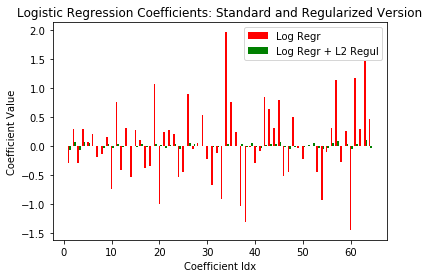

below 1e0  coef:     64
below 1e-1 coef:     63
below 1e-2 coef:     16
below 1e-3 coef:     1


In [12]:
#print the coefficients from logistic regression

print("Non regularized coefficients :",  reg_full.coef_ )


#print the coefficients from L2 regularized logistic regression

print("L2 regularized coefficients  :",  BestRegL2.coef_ )


# note that the intercept is not in coef_, it is in intercept_
print("Non regularized Intercept: {}".format( reg_full.intercept_ ))
print("L2 Regularized Intercept:  {}".format( BestRegL2.intercept_ ))

# Plot the coefficients
regL2_full_coef = BestRegL2.coef_.reshape(BestRegL2.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='g')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()


print("below 1e0  coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e0]))
print("below 1e-1 coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e-1]))
print("below 1e-2 coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e-2]))
print("below 1e-3 coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e-3]))

### TO DO 6: how do the coefficients from logistic regression with L2 regularization compare to the ones from logistic regression without regularization ? Why? (max 5 lines)

### Answer to the questions
From the plot is clearly visible that there is an high difference between the two cases, in particolar the coefficients obtained without regularization are very high compared to the ones with l2 regularization. 

In particulare we can observe that in the previous case only 8 coefficient had below 0.1 value while with the regularization almost all are below that value and 16 og the (25%) are even below 0.01 whereas before there was only 1.

This happens because without regulariziation the regression adapts better to the training set but due to the high coefficient values this may cause instability and a lower score in the test set compared to the regularized case (as seen below)

### TO DO 7: obtain classification accuracy on training and test data for the L2 regularized model

In [13]:
#now get training and test error and print training and test accuracy

# predictions on training data 
Y_training_prediction_LR_L2 = BestRegL2.predict(X_training)

# predictions on test data 
Y_test_prediction_LR_L2 = BestRegL2.predict(X_test)

print("Regularized L2 regression")
# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on training data
print("Training Accuracy:", metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2))

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn on test data
print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2))


#non regularized prediction
print("Non regularized regression")
Y_training_prediction_LR = reg_full.predict(X_training)
Y_test_prediction_LR = reg_full.predict(X_test)
# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset

print("Training Accuracy:", metrics.accuracy_score(Y_training, Y_training_prediction_LR))

# prediction on test data
# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_test_prediction_LR))


Regularized L2 regression
Training Accuracy: 0.77
Test Accuracy: 0.6648451730418944
Non regularized regression
Training Accuracy: 0.88
Test Accuracy: 0.5828779599271403


### TO DO 8: How does training and test accuracies change when using regularization? Comment (max 5 lines)

### Answer to the question

In the regularized case the training score is lower compared to the non regularized case but on the other hand the test score is higher.

This means that the case without the regularizion is able to better adapt to the training set but the result is not able to predict the result as well as the regularized regression whose training score is lower but does make better prediction. This means that in case of small training sets the regularized regression is a better predictor as expected.

### TO DO 9: Use larger datasets for training set

Perform the same estimation procedures using different more points on the training data, that is fix $m_{training} = 400$. You can simply copy and paste all the code you have written previously into the cell below.

/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alessandro/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Non regularized coefficients : [[-0.13054794  0.13054794 -0.13054794  0.13054794  0.28297386 -0.05895576
   0.05895576 -0.05862735  0.05862735 -0.07977761  0.07977761  0.81085199
   0.163775   -0.29109764 -0.00449037 -0.02707593 -1.71001837  0.12493263
   0.10237864  0.0387991   0.14546544 -0.01281517 -0.16645991 -0.12759459
   0.2020745   0.09223161 -0.24729971 -0.19579675  0.16753961  0.15200277
  -0.23667128  0.14586075 -0.05611805 -0.14889581  0.0715256  -0.01576548
  -0.09905743 -0.00456256  0.2149213  -0.0642147   0.03300547 -0.3564518
   0.33990934  0.08561366  0.20410612  0.05077979 -0.39887456  0.12880749
  -0.27504945  0.06159314  0.04407778  0.06425356 -0.40761502 -0.31971331
   0.02408733  0.25504326  0.32910679 -0.11614514  0.2215618  -0.08994711
  -0.12280814  0.10116629  0.250929   -0.26886806]]
L2 regularized coefficients  : [[-0.11810222  0.11810222 -0.11810222  0.11810222  0.22348107 -0.04638847
   0.04638847 -0.05687161  0.05687161 -0.08039935  0.08039935  0.14638151

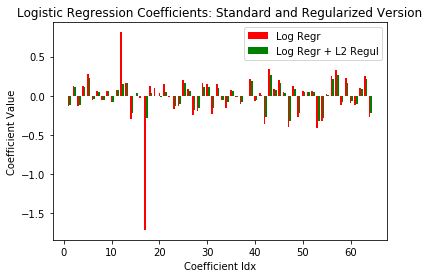

Regularized L2 regression
Training Accuracy: 0.7425
Test Accuracy: 0.6506024096385542
below 1e0  coef:     64
below 1e-1 coef:     32
below 1e-2 coef:     5
below 1e-3 coef:     0
Non regularized regression
Training Accuracy: 0.7375
Test Accuracy: 0.642570281124498
below 1e0  coef:     63
below 1e-1 coef:     25
below 1e-2 coef:     2
below 1e-3 coef:     0
Percenta difference in score:
training : -0.6779661016949158 %
test     : -1.2499999999999982 %


In [20]:
import pandas as pd
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
m = np.shape(X)[0]
permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]
m_training = 400 #  # use 100 samples for training + validation...
m_test = m-m_training # and the rest for testing
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)
m_training = X_training.shape[0]
m_test = X_test.shape[0]

from sklearn import preprocessing
X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)
scaler = preprocessing.StandardScaler().fit(X)
X_training = scaler.transform(X_training)
X_test = scaler.transform(X_test)

from sklearn import linear_model
reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')
reg.fit(X_training, Y_training)
CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)
reg_best_CV_accuracy = max(reg.scores_[1])

reg_full = linear_model.LogisticRegression(C=10000000)
reg_full.fit(X_training, Y_training)
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)

from sklearn import metrics
Y_training_prediction_LR = reg_full.predict(X_training)
Y_test_prediction_LR = reg_full.predict(X_test)


RegL2 = linear_model.LogisticRegressionCV(cv=10, penalty='l2', Cs=[10**x for x in range (-10,10)])
RegL2.fit(X_training, Y_training)
CV_accuracies = RegL2.scores_
RegL2_best_CV_accuracy = np.max(RegL2.scores_[1])
bestC=RegL2.C_[0] #if i plug in directly return error 
BestRegL2 = linear_model.LogisticRegression( penalty='l2', C=bestC)
BestRegL2.fit(X_training, Y_training)


print("Non regularized coefficients :",  reg_full.coef_ )
print("L2 regularized coefficients  :",  BestRegL2.coef_ )

print("Non regularized Intercept: {}".format( reg_full.intercept_ ))
print("L2 Regularized Intercept:  {}".format( BestRegL2.intercept_ ))

regL2_full_coef = BestRegL2.coef_.reshape(BestRegL2.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, reg_coef, width, color='r')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='g')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()

Y_training_prediction_LR_L2 = BestRegL2.predict(X_training)
Y_test_prediction_LR_L2 = BestRegL2.predict(X_test)

print("Regularized L2 regression")
print("Training Accuracy:", metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2))
print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2))


print("below 1e0  coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e0]))
print("below 1e-1 coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e-1]))
print("below 1e-2 coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e-2]))
print("below 1e-3 coef:    ",len(reg_full.coef_[abs(BestRegL2.coef_)<1e-3]))

print("Non regularized regression")
Y_training_prediction_LR = reg_full.predict(X_training)
Y_test_prediction_LR = reg_full.predict(X_test)
print("Training Accuracy:", metrics.accuracy_score(Y_training, Y_training_prediction_LR))
print("Test Accuracy:",metrics.accuracy_score(Y_test, Y_test_prediction_LR))

print("below 1e0  coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e0]))
print("below 1e-1 coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e-1]))
print("below 1e-2 coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e-2]))
print("below 1e-3 coef:    ",len(reg_full.coef_[abs(reg_full.coef_)<1e-3]))

print("Percenta difference in score:")
print("training :", 100*(metrics.accuracy_score(Y_training, Y_training_prediction_LR)-metrics.accuracy_score(Y_training, Y_training_prediction_LR_L2))/metrics.accuracy_score(Y_training, Y_training_prediction_LR), "%" )
print("test     :", 100*(metrics.accuracy_score(Y_test, Y_test_prediction_LR)-metrics.accuracy_score(Y_test, Y_test_prediction_LR_L2))/metrics.accuracy_score(Y_test, Y_test_prediction_LR), "%" )


### TO DO 10: Discuss all the questions above for the larger set (max 7 lines). Compare the impact of regularization in this case with the results you obtained for the smaller set.

### Answer to the question

In this case the coefficient (still equals to the number of features) of regularized and non regression are more comparable, there are more small coefficient in the non regularized case.

With a bigger dataset we can see that the coefficient of the non regularized regression are still bigger compared to the L2 regularized regression but they are now comparable in size in most of the cases.

Having a bigger data set in the training session the regularization impact is smaller in fact we can see that the training score and test score are still as described before (better training non regularized better test with L2) but in this case the difference between the 2 is very small (less that 2%) meaning that is this case also the non regularized regression is a good predictor; this is confirmed by the fact that with some seeds the result of the two regression is exactly the same so they are almost equal in term of prediction (the L2 is still a slight better predictor)